In [19]:
documents = []

ego_id = '40379006'

file = open('/home/amaury/Lucas/n2/textos_tradados/egos/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

file = open('/home/amaury/Lucas/n2/textos_tradados/alters/' + ego_id + '.txt', 'r')
for line in file:
    documents.append(line)
file.close()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

no_features = 1000 # max number of uniq words

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [28]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 10
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.7, init='nndsvd').fit(tf)

In [29]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                            for i in topic.argsort()[:-no_top_words - 1:-1]])
        print(message)
    print()

In [30]:
no_top_words = 5
display_topics(nmf, tf_feature_names, no_top_words)

Topic #0: god good know trust gift
Topic #1: love like live heart church
Topic #2: leaders goal lead best leadership
Topic #3: gt yes sure perfect classy
Topic #4: time want good hard feel
Topic #5: people know say read think
Topic #6: life live jesus come don
Topic #7: make look looking feel good
Topic #8: day great know think small
Topic #9: new live come video checkout



In [31]:
import pandas as pd
import numpy as np
   
# Create Document - Topic Matrix
nmf_output = nmf.transform(tf)

# column names
topicnames = ["Topic" + str(i) for i in range(no_topics)]

# index names
docnames = ["Doc" + str(i) for i in range(len(documents))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 6), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
   color = 'green' if val > .1 else 'black'
   return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0,0,0,0,0,0,0,0,0,0,0
Doc1,0,0.002949,0.006891,0,0.016037,0.00897,0,0.030748,0,0.0096,7
Doc2,0.001595,0.002553,0.009785,0.075839,0,0.005745,0.008488,0.000254,0.001817,7.3e-05,3
Doc3,0.124777,0,0,0,0.598961,0,0,0,0,0,4
Doc4,0,0.00097,0.005426,0,0.001923,0,0,0.000229,0,0.000201,2
Doc5,0.000428,0,0.001466,0,0.000689,0,0.004691,0,0,0.009929,9
Doc6,0.004917,0.008024,0.000198,0.00884,0,0.0105,0.014324,0.005871,0.009272,0.010988,6
Doc7,0,0.000135,0,0,0.000125,0,0,0,0.00927,0,8
Doc8,0.276417,0,0.023458,0,0,0,0.001908,0,0.011077,0,0
Doc9,0.147521,0,0.00786,0.003527,0.001052,0.007358,0.016208,0,0.00191,0.011749,0


In [32]:
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,0,584
1,6,301
2,9,295
3,8,283
4,7,277
5,5,216
6,4,203
7,1,199
8,2,191
9,3,170


In [33]:
df_topic_distribution = df_document_topic['dominant_topic']
i = 0
for doc in df_topic_distribution:
    if doc == 0:
        print(documents[i])
    i = i + 1

ARE CHEER PERFORMANCE TIGHTROPE FT 

LIGHT FIRE INSIDE YOU SEED ALMIGHTY GOD DON ALLOW SOMETHING SMALL KEEP GOD BEST 

WALK GIFT CALL DON COMPARE OTHERS GOD NEED YOU 

THE RIGHTEOUSNESS COME GOD FAITH PHIL 3 9 

HAHAHAHHA 

1 COR 13 5 IT DISHONOR OTHERS SELF SEEK EASILY ANGER KEEP RECORD WRONG 

BE CONTENT GOD SAY NEVER I LEAVE NEVER I FORSAKE HEBREWS 13 5 

BASICALLY 

NO PASSPORT REQUIRE 

GOD GOOD 

I GON PRAISE PRAISE TIL I GO 

ADIDASORIGINALS LATEST NMD COLORWAY R1 BLUE HIT STOCKISTS SOON 

DON SHOW GOD BIG PROBLEMS SHOW PROBLEMS BIG GOD 

GOD GREAT 

IF ACCEPT GOD ASK TROUBLE FORGE AHEAD WITHOUT PROMISE PROTECTION 

STEPHENCURRY30 FIRST UNANIMOUS MVP 

JUST SEE GO ANYMORE MEAN GOD CHANGE DESTINATION 

GOD PLAN BIGGER MISTAKE 

IF GO PRAY RAIN COMPLAIN MUD FACT REVIVAL 

SUCH AMAZING BAPTISMAL SERVICE TONIGHT GOD MOVE 

NONE 

TRAVEL MUCH 

WHEN TELL LESS IS MORE 

NUMBER ONE RULE LOFT 

AT FIRST FUNNY NOW TERRIFY 

GOD ALWAYS 

I THANK GOD I LIVE COUNTRY DREAM COME TRUE FAILURE 

Text(0.5, 1.0, 'Segregation of Topic Clusters')

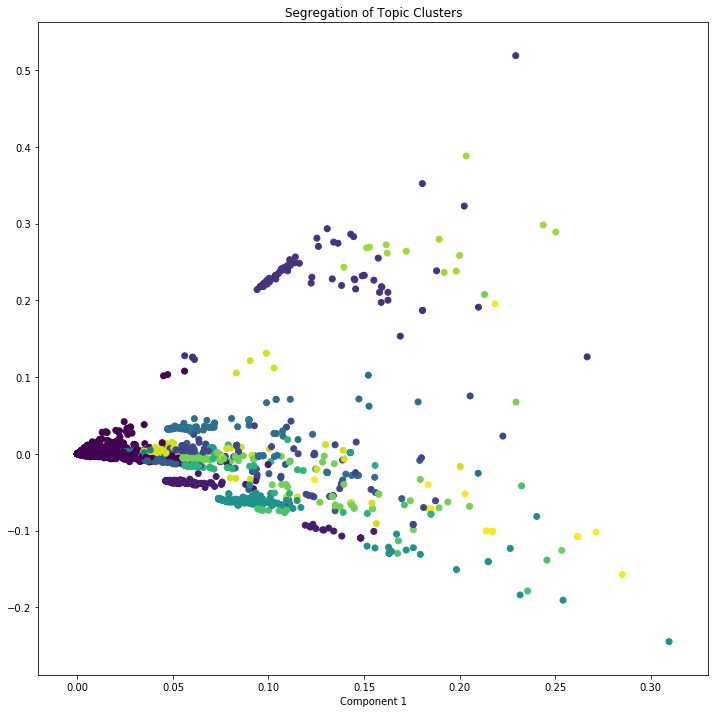

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=15, random_state=100).fit_predict(nmf_output)

# Build the Singular Value Decomposition(SVD) model
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=2)  # 2 components
nmf_output_svd = svd_model.fit_transform(nmf_output)

# X and Y axes of the plot using SVD decomposition
x = nmf_output_svd[:, 0]
y = nmf_output_svd[:, 1]

# Plot
plt.figure(figsize=(12, 12))
plt.scatter(x, y, c=clusters)
plt.xlabel('Component 2')
plt.xlabel('Component 1')
plt.title("Segregation of Topic Clusters", )